# Classification

## K-Nearest Neighbors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [5]:
iris = datasets.load_iris()

In [6]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data['species'] = pd.Series(iris.target)
target_names = iris.target_names

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
data.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [13]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

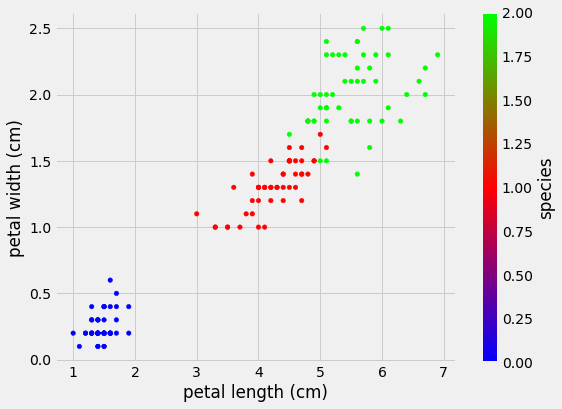

In [14]:
data.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c='species',  colormap='brg') 

In [15]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

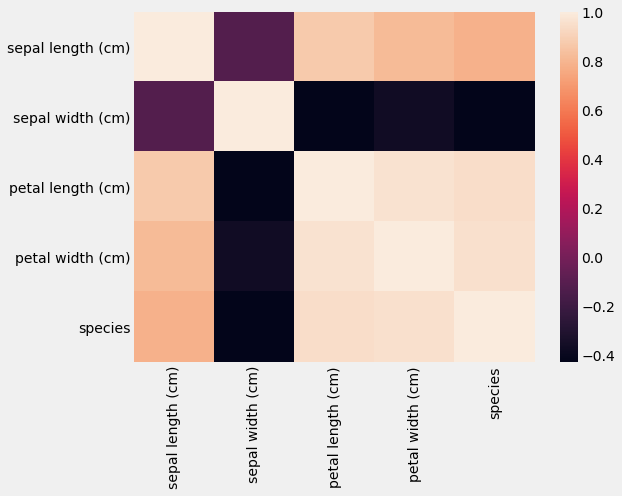

In [16]:
sns.heatmap(data.corr())

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [18]:
x = data.drop(labels=['species'], axis=1)
y = data.species

In [19]:
X = StandardScaler().fit_transform(x)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=322)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

In [28]:
from sklearn.model_selection import KFold

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=322)

In [44]:
len(data)

150

In [31]:
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [33]:
np.mean(scores)

0.9333333333333333

In [34]:
scores = []

for k in range (1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred==y_test) / len(y_test))
    scores.append([k, score])

In [36]:
score_df = pd.DataFrame(scores, columns=['k', 'score'])


<AxesSubplot:xlabel='k'>

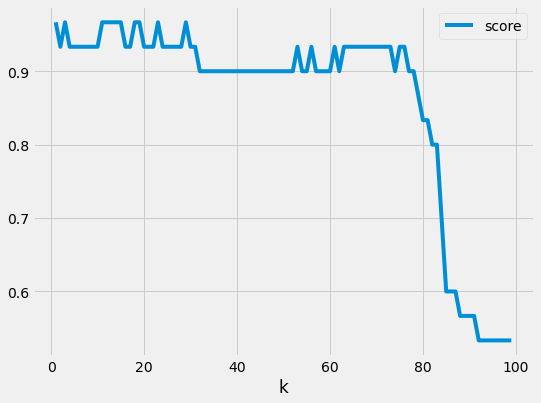

In [39]:
score_df.plot.line(x='k', y='score')

In [40]:
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [41]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.433333,0.500000
99,0.426667,0.466667
98,0.426667,0.466667
97,0.426667,0.466667
96,0.420000,0.466667


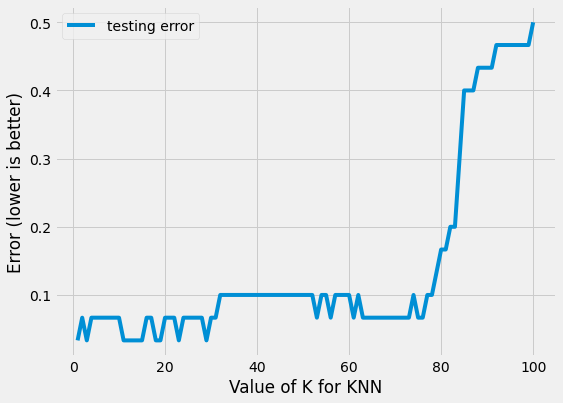

In [42]:
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [43]:
min(list(zip(testing_error, k_range)))

(0.033333333333333326, 1)

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=322)

In [48]:
dtc = DecisionTreeClassifier(random_state=322)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9473684210526315

In [51]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=322)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9473684210526315

In [53]:
print(export_text(dtc))

|--- feature_2 <= -0.74
|   |--- class: 0
|--- feature_2 >  -0.74
|   |--- feature_2 <= 0.68
|   |   |--- feature_3 <= 0.59
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.59
|   |   |   |--- feature_1 <= 0.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.68
|   |   |--- feature_2 <= 0.73
|   |   |   |--- feature_3 <= 0.79
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.79
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.73
|   |   |   |--- class: 2



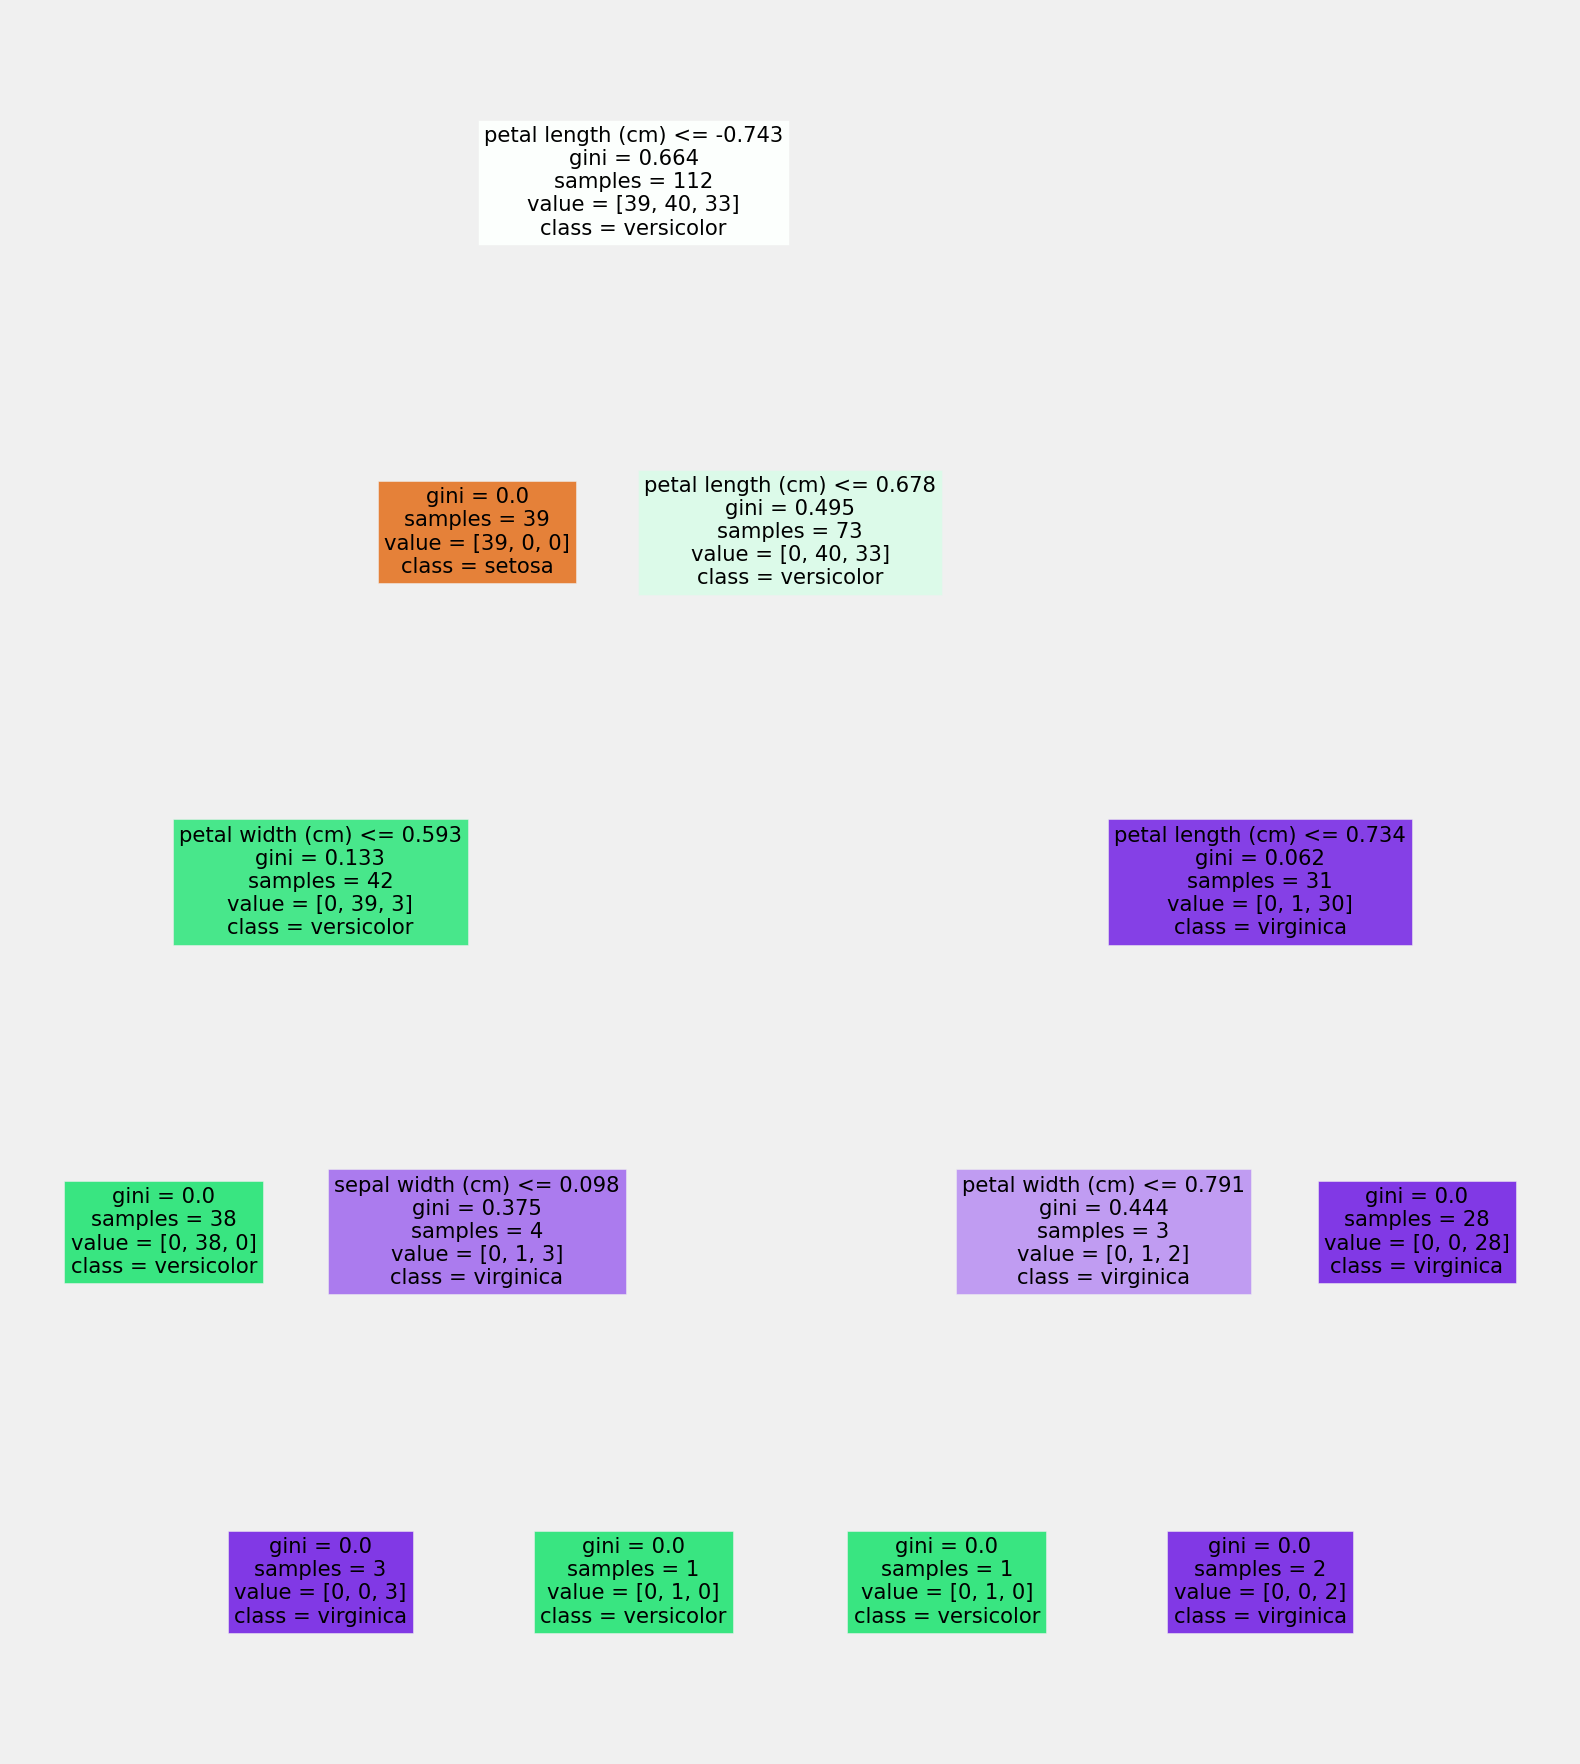

In [54]:
fig = plt.figure(figsize=(25, 30))
_ = plot_tree(dtc, feature_names = data.columns, class_names = target_names, filled=True)